# 각 월별 평균 수익률 차이의 유의성 검정

In [3]:
import pandas as pd
import numpy as np
import FinanceDataReader as fdr

## 1 코스피지수 데이터 수집 

In [4]:
# 코스피 변수 설정 = kospi
# 코스피(KS11)  일별수익률 불러오기

kospi = fdr.DataReader("KS11","20030101","20221231")

# 불러온 자료 보기
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-01-02,633.030029,637.099976,623.750000,635.169983,635.169983,742900.0
2003-01-03,651.590027,662.400024,649.619995,661.099976,661.099976,1005800.0
2003-01-06,665.099976,667.710022,657.609985,666.710022,666.710022,721800.0
2003-01-07,679.000000,679.299988,652.140015,652.200012,652.200012,690100.0
2003-01-08,655.969971,660.390015,650.929993,651.719971,651.719971,604900.0
...,...,...,...,...,...,...
2022-12-23,2325.860107,2333.080078,2311.899902,2313.689941,2313.689941,367000.0
2022-12-26,2312.540039,2321.919922,2304.199951,2317.139893,2317.139893,427600.0
2022-12-27,2327.520020,2335.989990,2321.479980,2332.790039,2332.790039,448300.0


In [5]:
# # 공시 및 기업 이유에 대해서 0값이 있는 경우를 삭제 시키기
# idx = kospi[kospi['Open'] == 0].index
# kospi.drop(idx , inplace=True)


In [6]:
# 1. index 초기화
kospi.reset_index(inplace=True)

In [7]:
# 월말 데이터로 변경하기 위한 Group by 이용 데이터 수정
how = {
    'Open' : 'first',
    'High' : 'max',
    'Low' : 'min',
    'Close' : 'last',
    'Volume' : 'sum'

}
kospi_month = kospi.groupby(pd.Grouper(key='Date',freq='m')).agg(how)
kospi_month

,Open,High,Low,Close,Volume
Date,,,,,
2003-01-31,633.030029,679.299988,581.130005,591.859985,12593300.0
2003-02-28,591.880005,619.450012,561.690002,575.429993,11616700.0
2003-03-31,578.500000,590.549988,512.299988,535.700012,14942400.0
2003-04-30,529.070007,627.500000,525.510010,599.349976,15513400.0
2003-05-31,600.469971,637.190002,582.869995,633.419983,9592400.0
...,...,...,...,...,...
2022-08-31,2444.050049,2546.350098,2417.010010,2472.050049,9760600.0
2022-09-30,2443.000000,2453.949951,2134.770020,2155.489990,9370100.0
2022-10-31,2189.510010,2295.510010,2162.870117,2293.610107,11769900.0


In [8]:
# 월마다의 수익률 계산을 위해 월별 시초와 종가의 수익률을 확인
kospi_month["Change"] = (kospi_month["Close"] - kospi_month["Open"])/kospi_month["Open"] *100
kospi_month

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2003-01-31,633.030029,679.299988,581.130005,591.859985,12593300.0,-6.503648
2003-02-28,591.880005,619.450012,561.690002,575.429993,11616700.0,-2.779282
2003-03-31,578.500000,590.549988,512.299988,535.700012,14942400.0,-7.398442
2003-04-30,529.070007,627.500000,525.510010,599.349976,15513400.0,13.283680
2003-05-31,600.469971,637.190002,582.869995,633.419983,9592400.0,5.487370
...,...,...,...,...,...,...
2022-08-31,2444.050049,2546.350098,2417.010010,2472.050049,9760600.0,1.145639
2022-09-30,2443.000000,2453.949951,2134.770020,2155.489990,9370100.0,-11.768727
2022-10-31,2189.510010,2295.510010,2162.870117,2293.610107,11769900.0,4.754493


# 2. 월별 평균 구하기

In [9]:
# 1. index 초기화
kospi_month.reset_index(inplace=True)


In [10]:
kospi_month

,Date,Open,High,Low,Close,Volume,Change
0,2003-01-31,633.030029,679.299988,581.130005,591.859985,12593300.0,-6.503648
1,2003-02-28,591.880005,619.450012,561.690002,575.429993,11616700.0,-2.779282
2,2003-03-31,578.500000,590.549988,512.299988,535.700012,14942400.0,-7.398442
3,2003-04-30,529.070007,627.500000,525.510010,599.349976,15513400.0,13.283680
4,2003-05-31,600.469971,637.190002,582.869995,633.419983,9592400.0,5.487370
...,...,...,...,...,...,...,...
235,2022-08-31,2444.050049,2546.350098,2417.010010,2472.050049,9760600.0,1.145639
236,2022-09-30,2443.000000,2453.949951,2134.770020,2155.489990,9370100.0,-11.768727
237,2022-10-31,2189.510010,2295.510010,2162.870117,2293.610107,11769900.0,4.754493
238,2022-11-30,2301.580078,2499.429932,2296.439941,2472.530029,12745000.0,7.427504


In [12]:
# 날짜의 데이터 타입 확인

# 만약 object인경우 pd.to_datetime을 통해 데이터 타입 변경
kospi_month.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    240 non-null    datetime64[ns]
 1   Open    240 non-null    float64       
 2   High    240 non-null    float64       
 3   Low     240 non-null    float64       
 4   Close   240 non-null    float64       
 5   Volume  240 non-null    float64       
 6   Change  240 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.2 KB


In [13]:
#파생변수로 날짜의 월을 만들기
kospi_month['month'] = kospi_month['Date'].dt.month
kospi_month

,Date,Open,High,Low,Close,Volume,Change,month
0,2003-01-31,633.030029,679.299988,581.130005,591.859985,12593300.0,-6.503648,1
1,2003-02-28,591.880005,619.450012,561.690002,575.429993,11616700.0,-2.779282,2
2,2003-03-31,578.500000,590.549988,512.299988,535.700012,14942400.0,-7.398442,3
3,2003-04-30,529.070007,627.500000,525.510010,599.349976,15513400.0,13.283680,4
4,2003-05-31,600.469971,637.190002,582.869995,633.419983,9592400.0,5.487370,5
...,...,...,...,...,...,...,...,...
235,2022-08-31,2444.050049,2546.350098,2417.010010,2472.050049,9760600.0,1.145639,8
236,2022-09-30,2443.000000,2453.949951,2134.770020,2155.489990,9370100.0,-11.768727,9
237,2022-10-31,2189.510010,2295.510010,2162.870117,2293.610107,11769900.0,4.754493,10
238,2022-11-30,2301.580078,2499.429932,2296.439941,2472.530029,12745000.0,7.427504,11


In [14]:
kospi_month.set_index("Date",inplace=True)
kospi_month

,Open,High,Low,Close,Volume,Change,month
Date,,,,,,,
2003-01-31,633.030029,679.299988,581.130005,591.859985,12593300.0,-6.503648,1
2003-02-28,591.880005,619.450012,561.690002,575.429993,11616700.0,-2.779282,2
2003-03-31,578.500000,590.549988,512.299988,535.700012,14942400.0,-7.398442,3
2003-04-30,529.070007,627.500000,525.510010,599.349976,15513400.0,13.283680,4
2003-05-31,600.469971,637.190002,582.869995,633.419983,9592400.0,5.487370,5
...,...,...,...,...,...,...,...
2022-08-31,2444.050049,2546.350098,2417.010010,2472.050049,9760600.0,1.145639,8
2022-09-30,2443.000000,2453.949951,2134.770020,2155.489990,9370100.0,-11.768727,9
2022-10-31,2189.510010,2295.510010,2162.870117,2293.610107,11769900.0,4.754493,10


In [72]:
# groupy 를 통해 평균과 표준편차 구하기, 및 DataFrame 화 연율화시켜서 확인
change_mean = kospi_month.groupby(by='month')["Change"].mean()
change_std= kospi_month.groupby(by='month')["Change"].std()

print(change_mean.sort_values(ascending=False))
print(change_std.sort_values(ascending=False))


month
4     3.066641
7     2.202394
12    1.403465
11    1.351565
9     0.846991
3     0.810750
2     0.184945
5    -0.079389
8    -0.227716
6    -0.587675
1    -0.804970
10   -0.905424
Name: Change, dtype: float64
month
10    8.014232
3     5.767773
1     5.697310
9     5.457843
7     5.419624
11    5.284264
4     5.209022
5     5.140187
12    5.032219
8     4.719599
6     4.693418
2     4.145098
Name: Change, dtype: float64


In [ ]:
# 변동계수 구해보기
# change_CV = change_mean/change_std
# print(change_CV.sort_values(ascending=False))

In [73]:
# 각 월별 평균과 표준편차 데이터 프레임 화
month_return = pd.DataFrame( data= {'month':change_mean.index,
                            'mean': change_mean,
                            'std':change_std})
month_return

,month,mean,std
month,,,
1,1,-0.804970,5.697310
2,2,0.184945,4.145098
3,3,0.810750,5.767773
4,4,3.066641,5.209022
5,5,-0.079389,5.140187
6,6,-0.587675,4.693418
7,7,2.202394,5.419624
8,8,-0.227716,4.719599
9,9,0.846991,5.457843


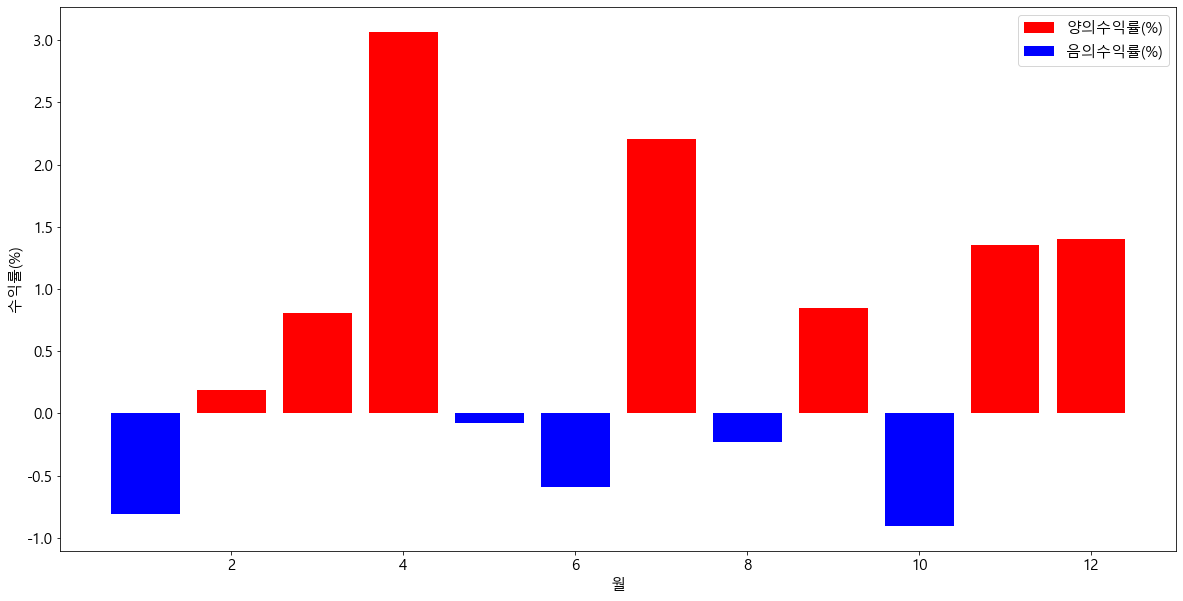

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20,10))


# 양의 수익률을 기록한 월
x1 = change_mean[change_mean > 0].index
y1 = change_mean[change_mean > 0]

# 음의 수익률을 기록한 월
x2 = change_mean[change_mean < 0].index
y2 = change_mean[change_mean < 0]

# 그래프로 표현
plt.bar(x1,y1,color='r',label='양의수익률(%)')
plt.bar(x2,y2,color='b',label='음의수익률(%)')

plt.rc('font',size=15)


        

plt.xlabel('월')
plt.ylabel('수익률(%)')

plt.legend()
plt.show()

# 3 월별 수익률에 대한 유의성 검정

### 3-1 아노바 분석을 위한 정규성, 등분산성 검정

In [75]:
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
from scipy.stats import kstest

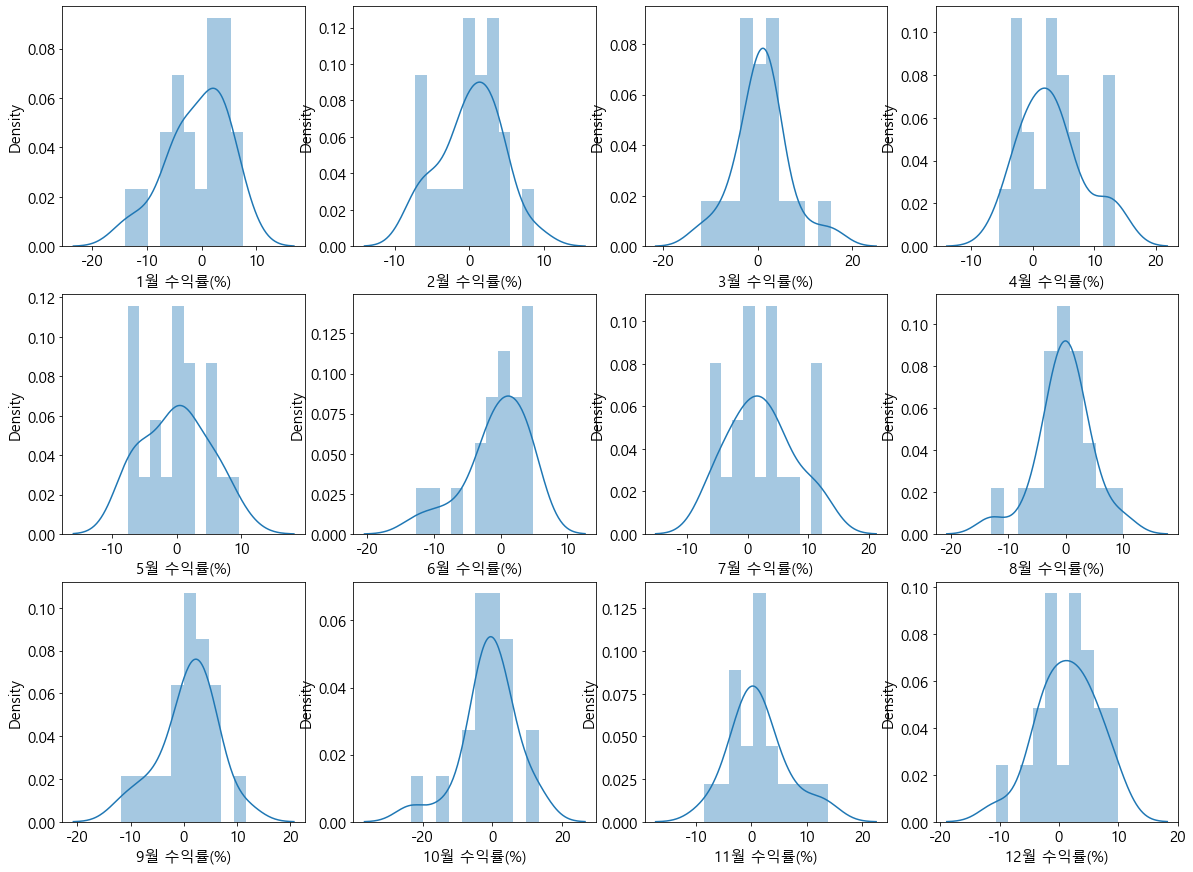

In [76]:

## histogram 확인
col_n = 4
row_n = 3

fig, ax = plt.subplots(ncols=col_n, nrows=row_n, figsize=(20,row_n*5))

for i in range(0,12):
    a = sns.distplot(kospi_month[kospi_month["month"] == i+1]["Change"], bins=10, ax=ax[int(i/col_n),int(i%col_n)])
    a.set(xlabel='{0}월 수익률(%)'.format(i+1))

In [77]:
# 샤피로 테스트
# p-value 가 0.05 이상이면 정규성이 있다 0.05보다 작으면 정규성이 없다고 판단
for i in range(1,13):
    a = stats.shapiro(kospi_month[kospi_month["month"] == i]["Change"])[1]
    print('{0} 월 수익률의 p-value {1}'.format(i,a))

1 월 수익률의 p-value 0.3207145631313324
2 월 수익률의 p-value 0.5480293035507202
3 월 수익률의 p-value 0.21575309336185455
4 월 수익률의 p-value 0.14620789885520935
5 월 수익률의 p-value 0.32601502537727356
6 월 수익률의 p-value 0.04489986225962639
7 월 수익률의 p-value 0.6315429210662842
8 월 수익률의 p-value 0.3453604578971863
9 월 수익률의 p-value 0.46924158930778503
10 월 수익률의 p-value 0.12363950163125992
11 월 수익률의 p-value 0.4159497320652008
12 월 수익률의 p-value 0.9366208910942078


In [78]:
# KS 테스트
# p-value 가 0.05 이상이면 정규성이 있다 0.05보다 작으면 정규성이 없다고 판단
for i in range(1,13):
    a = stats.kstest(kospi_month[kospi_month["month"] == i]["Change"],'norm')[1]
    print('{0} 월 수익률의 p-value {1}'.format(i,a))

1 월 수익률의 p-value 0.0005857676750861129
2 월 수익률의 p-value 0.005063652452075296
3 월 수익률의 p-value 0.0002568493319129715
4 월 수익률의 p-value 8.025010969750508e-08
5 월 수익률의 p-value 0.011753274745402997
6 월 수익률의 p-value 0.007188896191855032
7 월 수익률의 p-value 0.00011376944922164376
8 월 수익률의 p-value 0.024374410313452666
9 월 수익률의 p-value 4.4321158957237514e-05
10 월 수익률의 p-value 0.00046181361786468145
11 월 수익률의 p-value 0.015185074886574834
12 월 수익률의 p-value 1.949947989403437e-05


In [79]:
# 등분산성 검정을 위한 바틀렛 검정
# p-value 0.05 이상이면 등분산성 만족
from scipy.stats import bartlett
a = stats.bartlett(kospi_month[kospi_month["month"] == 1]["Change"],
                   kospi_month[kospi_month["month"] == 2]["Change"],
                   kospi_month[kospi_month["month"] == 3]["Change"],
                   kospi_month[kospi_month["month"] == 4]["Change"],
                   kospi_month[kospi_month["month"] == 5]["Change"],
                   kospi_month[kospi_month["month"] == 6]["Change"],
                   kospi_month[kospi_month["month"] == 7]["Change"],
                   kospi_month[kospi_month["month"] == 8]["Change"],
                   kospi_month[kospi_month["month"] == 9]["Change"],
                   kospi_month[kospi_month["month"] == 10]["Change"],
                   kospi_month[kospi_month["month"] == 11]["Change"],
                   kospi_month[kospi_month["month"] == 12]["Change"])
a

BartlettResult(statistic=11.75619271332479, pvalue=0.38224572262665185)

In [80]:
# 정규성 등분산성을 만족을 하였기 때문에 아노바 분석 진행

### 3-2 아노바 분석

In [81]:
## Stats Model을 활용한 방법1. 
# F-Ratio가 1을 넘었기 때문에 그룹 간 평균에 차이가 있음을 시사한다. 
# 모델의 p-value 또한 유의하기 때문에  Ratio를 받아들인다. 

F, p = stats.f_oneway(kospi_month[kospi_month["month"] == 1]["Change"],
                   kospi_month[kospi_month["month"] == 2]["Change"],
                   kospi_month[kospi_month["month"] == 3]["Change"],
                   kospi_month[kospi_month["month"] == 4]["Change"],
                   kospi_month[kospi_month["month"] == 5]["Change"],
                   kospi_month[kospi_month["month"] == 6]["Change"],
                   kospi_month[kospi_month["month"] == 7]["Change"],
                   kospi_month[kospi_month["month"] == 8]["Change"],
                   kospi_month[kospi_month["month"] == 9]["Change"],
                   kospi_month[kospi_month["month"] == 10]["Change"],
                   kospi_month[kospi_month["month"] == 11]["Change"],
                   kospi_month[kospi_month["month"] == 12]["Change"])
print( 'F-Ratio: {}'.format(F)
    , 'p-value:{}'.format(p)
     , sep = '\n')

F-Ratio: 1.0339638701806149
p-value:0.4171686708309901
